<img src="https://gitlab.com/bivl2ab/academico/macv/semillero-uis-2020-2/-/raw/master/img/Banner_Logo.jpeg" alt="Drawing" style="width:700px;">

# <center> 07. Test deep models </center>

**connect google colab and google drive**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [67]:
import pandas as pd
import numpy as np
import imageio
import tensorflow as tf
import matplotlib.pyplot as plt
import imageio
from skimage.transform import resize

**create and train deep model**

In [3]:
train1pd = pd.read_csv("/content/drive/My Drive/Colab Notebooks/semillero/dataset/tma_info/ZT76_pgleason_scores.csv",sep='\t', index_col=0)
train1pd = train1pd.reset_index()
print(train1pd.head())

                                          patch_name  grade_
0  /content/drive/My Drive/Colab Notebooks/semill...       1
1  /content/drive/My Drive/Colab Notebooks/semill...       1
2  /content/drive/My Drive/Colab Notebooks/semill...       1
3  /content/drive/My Drive/Colab Notebooks/semill...       1
4  /content/drive/My Drive/Colab Notebooks/semill...       1


In [4]:
#randon transformations
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=40,
    zoom_range=[0.9, 1.25],
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='reflect'
)

In [6]:
train1pd = train1pd.astype({"grade_": 'string'})
#select only first 160 images
train1pd = train1pd.iloc[0:160]

In [7]:
#create generator
train_generator = datagen.flow_from_dataframe(
    train1pd,
    directory=None,
    x_col="patch_name",
    y_col="grade_",
    batch_size=32,
    shuffle=True,
    target_size=(224,224)
)

Found 160 validated image filenames belonging to 3 classes.


In [8]:
# create deep model
base_model = tf.keras.applications.VGG16(include_top=False, weights='imagenet', input_shape=(224, 224, 3), pooling='avg')
x_top = base_model.output
# number of classes 3
x_out = tf.keras.layers.Dense(3, name='output', activation='softmax')(x_top)
model = tf.keras.models.Model(base_model.input, x_out)

58892288/58889256 [==============================] - 1s 0us/step


In [9]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [10]:
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.0001),
              loss='categorical_crossentropy', metrics = ['accuracy'])

In [11]:
# train model
history = model.fit(
                train_generator,
                epochs=10
      )

Epoch 1/10
5/5 [==============================] - 23s 5s/step - loss: 5.4255 - accuracy: 0.3500
Epoch 2/10
5/5 [==============================] - 3s 659ms/step - loss: 1.9408 - accuracy: 0.3688
Epoch 3/10
5/5 [==============================] - 3s 654ms/step - loss: 1.0233 - accuracy: 0.4875
Epoch 4/10
5/5 [==============================] - 3s 655ms/step - loss: 0.8321 - accuracy: 0.6125
Epoch 5/10
5/5 [==============================] - 3s 657ms/step - loss: 0.4728 - accuracy: 0.9000
Epoch 6/10
5/5 [==============================] - 3s 659ms/step - loss: 0.9163 - accuracy: 0.6500
Epoch 7/10
5/5 [==============================] - 3s 659ms/step - loss: 0.7807 - accuracy: 0.6187
Epoch 8/10
5/5 [==============================] - 3s 664ms/step - loss: 0.5315 - accuracy: 0.7688
Epoch 9/10
5/5 [==============================] - 3s 671ms/step - loss: 0.3846 - accuracy: 0.8313
Epoch 10/10
5/5 [==============================] - 3s 672ms/step - loss: 0.2567 - accuracy: 0.9125


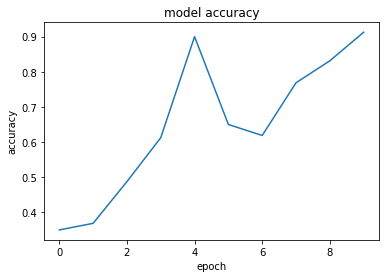

In [12]:
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

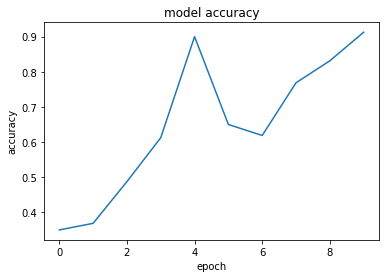

In [13]:
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

**Load test data**

In [38]:
test1pd = pd.read_csv("/content/drive/My Drive/Colab Notebooks/semillero/dataset/tma_info/ZT80_pgleason_scores.csv",sep='\t', index_col=0)
test1pd = train1pd.reset_index()
print(test1pd)

      index  ... y_cord2
0         0  ...     750
1         1  ...     750
2         2  ...     750
3         3  ...    1125
4         4  ...    1125
...     ...  ...     ...
4232   4232  ...    1875
4233   4233  ...    1875
4234   4234  ...    2250
4235   4235  ...    2250
4236   4236  ...    2250

[4237 rows x 9 columns]


In [39]:
test1pd.iloc[0]

index                                                          0
patch_name1    /content/drive/My Drive/Colab Notebooks/semill...
grade_1                                                        2
x_cord1                                                     1500
y_cord1                                                      750
patch_name2    /content/drive/My Drive/Colab Notebooks/semill...
grade_2                                                        2
x_cord2                                                     1500
y_cord2                                                      750
Name: 0, dtype: object

In [40]:
test1pd = test1pd.astype({"grade_1": 'string', "grade_2": 'string'})
#select only first 160 images
test1pd = test1pd.iloc[0:160]
print(test1pd.head())

   index                                        patch_name1  ... x_cord2  y_cord2
0      0  /content/drive/My Drive/Colab Notebooks/semill...  ...    1500      750
1      1  /content/drive/My Drive/Colab Notebooks/semill...  ...    1875      750
2      2  /content/drive/My Drive/Colab Notebooks/semill...  ...    2250      750
3      3  /content/drive/My Drive/Colab Notebooks/semill...  ...    1500     1125
4      4  /content/drive/My Drive/Colab Notebooks/semill...  ...    1875     1125

[5 rows x 9 columns]


To test the model is not necessary to generate new data. We can use the original test data without transformations

In [41]:
testdatagen = tf.keras.preprocessing.image.ImageDataGenerator()

**test for patho 1**

In [42]:
test_generator = testdatagen.flow_from_dataframe(
    test1pd,
    directory=None,
    x_col="patch_name1",
    y_col="grade_1",
    batch_size=32,
    shuffle=True,
    target_size=(224,224)
)

Found 160 validated image filenames belonging to 3 classes.


In [43]:
model.evaluate(test_generator)

5/5 [==============================] - 1s 289ms/step - loss: 1.9567 - accuracy: 0.6750


[1.956711769104004, 0.675000011920929]

In [45]:
probs1 = model.predict(test_generator)

In [46]:
probs1[0]

array([0.75973946, 0.14078112, 0.09947947], dtype=float32)

**test for patho2**

In [47]:
test_generator = testdatagen.flow_from_dataframe(
    test1pd,
    directory=None,
    x_col="patch_name2",
    y_col="grade_2",
    batch_size=32,
    shuffle=True,
    target_size=(224,224)
)

Found 160 validated image filenames belonging to 3 classes.


In [48]:
model.evaluate(test_generator)

5/5 [==============================] - 30s 6s/step - loss: 3.9236 - accuracy: 0.3938


[3.9236044883728027, 0.39375001192092896]

In [49]:
probs2 = model.predict(test_generator)

**predict for one image**

patch class: 2


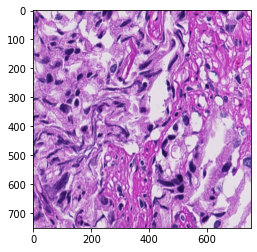

In [74]:
img = imageio.imread(test1pd["patch_name1"][0])
print("patch class:", test1pd["grade_1"][0])
plt.imshow(img)

In [75]:
img = resize(img,((1,224,224,3)))
probs = model.predict(img)
probs

array([[0.5113904 , 0.17467268, 0.31393695]], dtype=float32)

In [76]:
predclass = np.argmax(probs)
predclass

0

## Referencias

[1] Keras models: https://keras.io/api/applications/

[2] Keras data generators: https://keras.io/api/preprocessing/image/

[3] Keras tutorial: https://elitedatascience.com/keras-tutorial-deep-learning-in-python